# VGG16

2023-04-25 14:34:56.697235: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


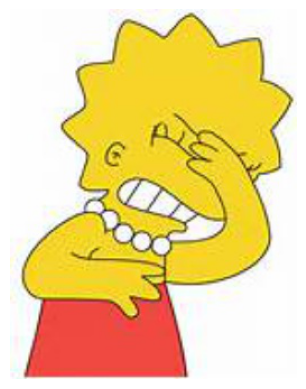

In [4]:
# Definition of the paths and visualisation of some sample images
from keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
root_dir = './dataset-Simpsons_Main_Characters/'
train_dir = root_dir + 'train_images/'
test_dir = root_dir + 'test_images/'

img = load_img(train_dir + "lisa_simpson/pic_0081.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
from glob import glob

# useful for getting number of files
image_files = glob(train_dir + '/*/*.jp*g')
valid_image_files = glob(test_dir + '/*/*.jp*g')

# useful for getting number of classes
folders = glob(train_dir + '/*')
print(folders)

['./dataset-Simpsons_Main_Characters/train_images/maggie_simpson', './dataset-Simpsons_Main_Characters/train_images/marge_simpson', './dataset-Simpsons_Main_Characters/train_images/bart_simpson', './dataset-Simpsons_Main_Characters/train_images/lisa_simpson', './dataset-Simpsons_Main_Characters/train_images/homer_simpson']


In [6]:
# image matrix shape with rgb
x = img_to_array(img)
x.shape

(330, 256, 3)

In [7]:
# Definition of image shape and number of classes
# how many classes are there in dataset?
classNames = glob(train_dir + "/*")
numberOfClass = len(classNames)
print("The number of class:", numberOfClass)

The number of class: 5


In [35]:
# Resize all the images to fit this size.
IMAGE_SIZE = [224, 224]

# training config:
epochs = 30
batch_size = 32

In [26]:
from keras.applications.vgg16 import VGG16
# Addition of a pre-treatment layer to the front of the VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [27]:
from keras.layers import Input, Lambda, Dense, Flatten
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [28]:
from keras.models import Model
# Creation of model object
model = Model(inputs=vgg.input, outputs=prediction)

# See the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [29]:
# Tell the model which costing method and which optimisation method it should use.
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [30]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
# Create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

Found 404 images belonging to 5 classes.
{'bart_simpson': 0, 'homer_simpson': 1, 'lisa_simpson': 2, 'maggie_simpson': 3, 'marge_simpson': 4}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -116.779 max: 148.42569


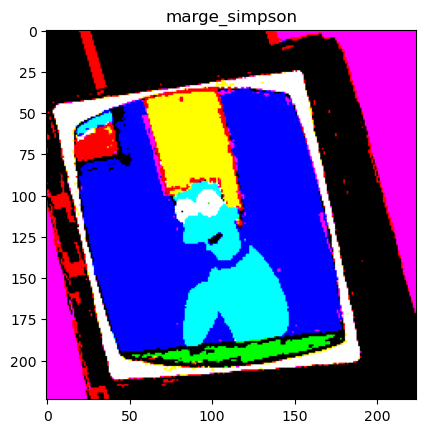

In [31]:
import numpy as np

# get label mapping for confusion matrix plot later
test_gen = gen.flow_from_directory(test_dir, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
    labels[v] = k

# should be a strangely colored image (due to VGG weights being BGR)
for x, y in test_gen:
    print("min:", x[0].min(), "max:", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.imshow(x[0])
    plt.show()
    break

In [32]:
# create generators
train_generator = gen.flow_from_directory(
  train_dir,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  test_dir,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 6936 images belonging to 5 classes.
Found 404 images belonging to 5 classes.


In [36]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

/var/folders/sq/ggvvj1j97qqfplbr1w1t952h0000gp/T/ipykernel_17552/188470804.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30


2023-04-25 22:21:26.338549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


216/216 [==============================] - ETA: 0s - loss: 6.2886 - accuracy: 0.8712

2023-04-25 22:42:11.314466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


216/216 [==============================] - 1319s 6s/step - loss: 6.2886 - accuracy: 0.8712 - val_loss: 30.2491 - val_accuracy: 0.6719
Epoch 2/30
216/216 [==============================] - 1415s 7s/step - loss: 6.0496 - accuracy: 0.8766 - val_loss: 32.8014 - val_accuracy: 0.6484
Epoch 3/30
216/216 [==============================] - 1385s 6s/step - loss: 6.3501 - accuracy: 0.8760 - val_loss: 26.6859 - val_accuracy: 0.6901
Epoch 4/30
216/216 [==============================] - 1273s 6s/step - loss: 6.2464 - accuracy: 0.8812 - val_loss: 36.8909 - val_accuracy: 0.6589
Epoch 5/30
216/216 [==============================] - 1481s 7s/step - loss: 6.2874 - accuracy: 0.8821 - val_loss: 33.0868 - val_accuracy: 0.6667
Epoch 6/30
216/216 [==============================] - 1503s 7s/step - loss: 6.2461 - accuracy: 0.8851 - val_loss: 33.1956 - val_accuracy: 0.7057
Epoch 7/30
216/216 [==============================] - 1798s 8s/step - loss: 6.0463 - accuracy: 0.8892 - val_loss: 27.5576 - val_accuracy: 0.6

In [37]:
from sklearn.metrics import confusion_matrix
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
    print("Generating confusion matrix", N)
    predictions = []
    targets = []
    i = 0
    for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
        i += 1
        if i % 50 == 0:
            p = model.predict(x)
            p = np.argmax(p, axis=1)
            y = np.argmax(y, axis=1)
            predictions = np.concatenate((predictions, p))
            targets = np.concatenate((targets, y))
            if len(targets) >= N:
                break

    cm = confusion_matrix(targets, predictions)
    return cm


cm = get_confusion_matrix(train_dir, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(test_dir, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 6936
Found 6936 images belonging to 5 classes.
1/1 [==============================] - 2s 2s/step
[[1044  137   63    2   15]
 [  25 2100   22    2   16]
 [  27   68 1164    8    6]
 [   5    9   10 1000    3]
 [  34  137   34    3 1002]]
Generating confusion matrix 404
Found 404 images belonging to 5 classes.
1/1 [==============================] - 2s 2s/step
[[68 10  2  1  0]
 [ 0 78  1  0  2]
 [ 4 10 60  6  0]
 [ 9 24 36  9  3]
 [ 6 18  6  0 51]]


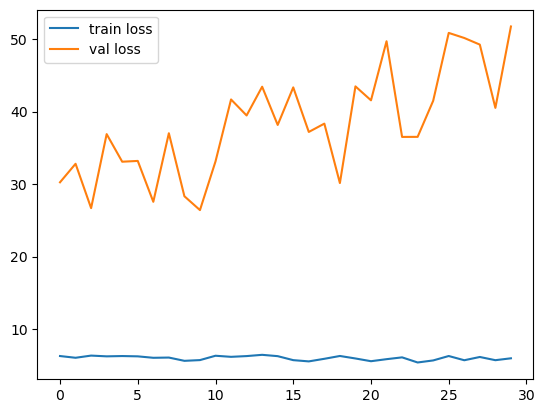

In [38]:
# plot some data

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


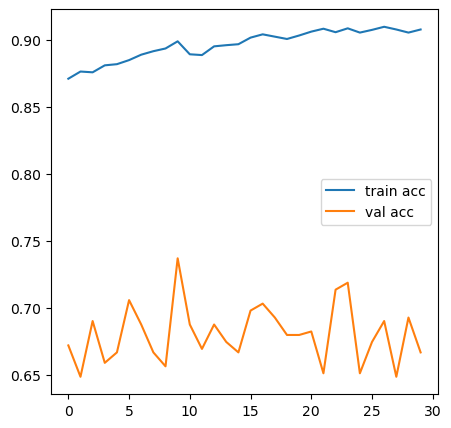

In [48]:
# accuracies

plt.figure(figsize=(5, 5))
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [41]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.rcParams["figure.figsize"] = (40,20)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[1044  137   63    2   15]
 [  25 2100   22    2   16]
 [  27   68 1164    8    6]
 [   5    9   10 1000    3]
 [  34  137   34    3 1002]]


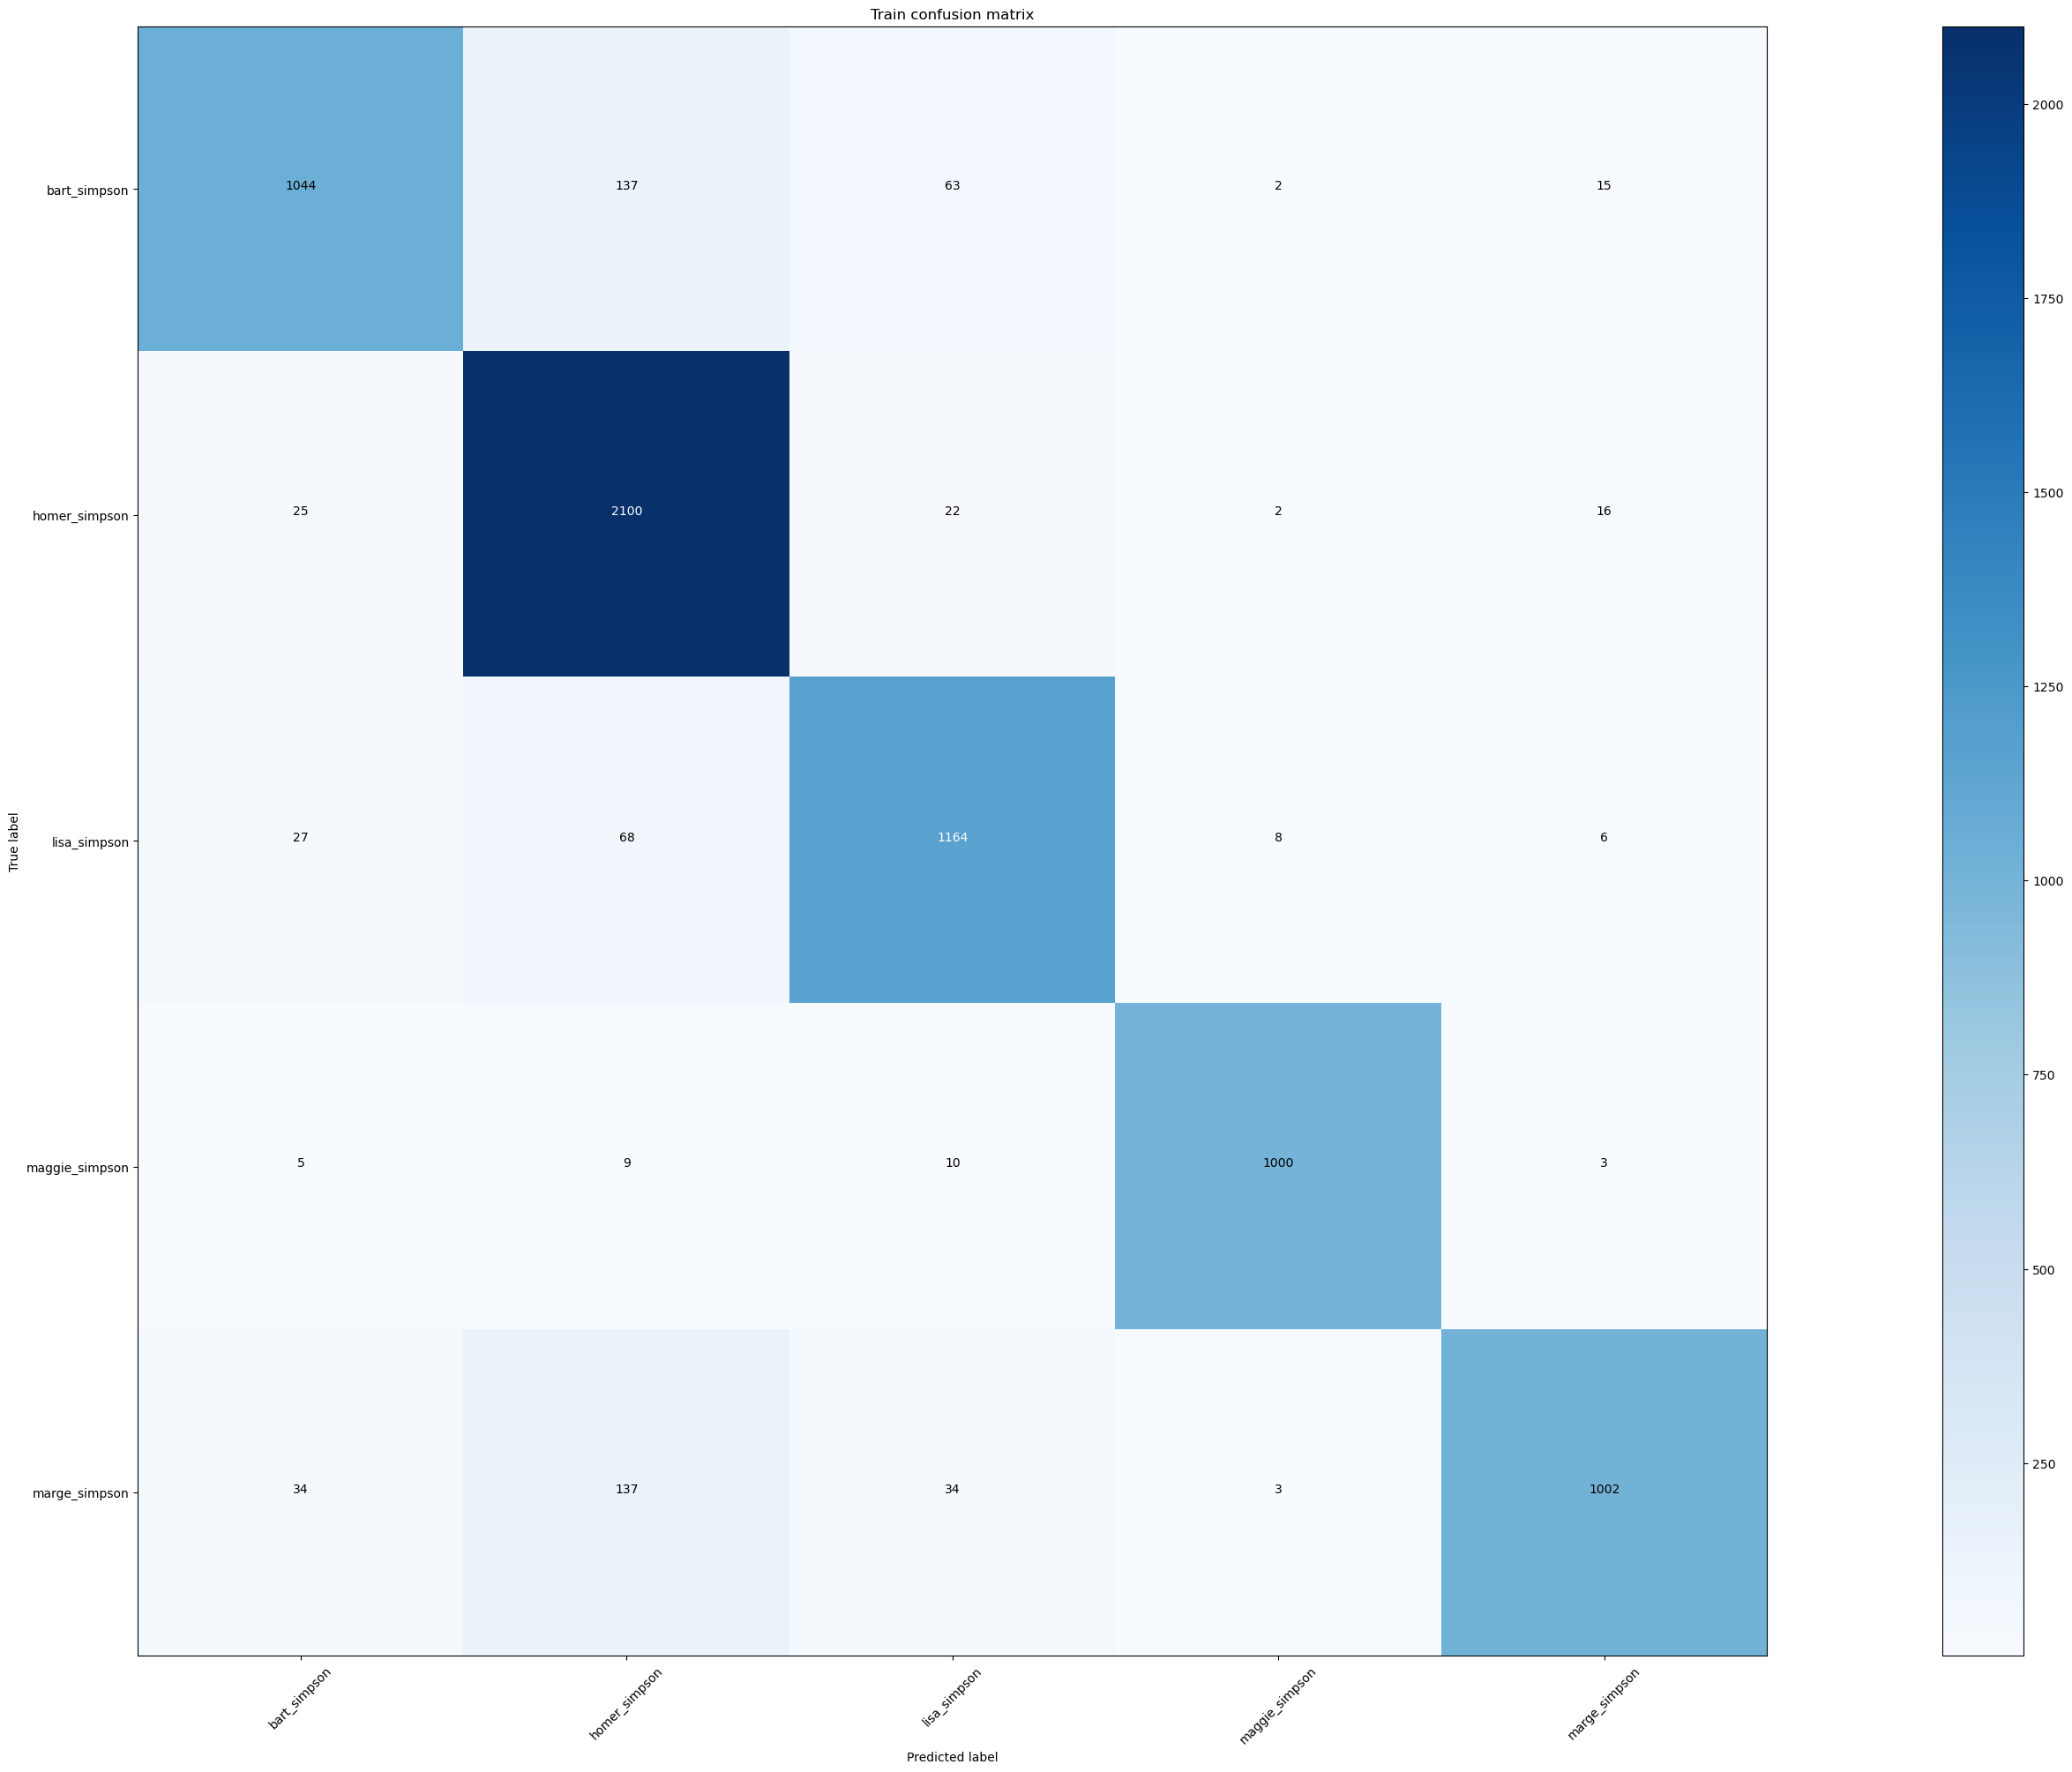

Confusion matrix, without normalization
[[68 10  2  1  0]
 [ 0 78  1  0  2]
 [ 4 10 60  6  0]
 [ 9 24 36  9  3]
 [ 6 18  6  0 51]]


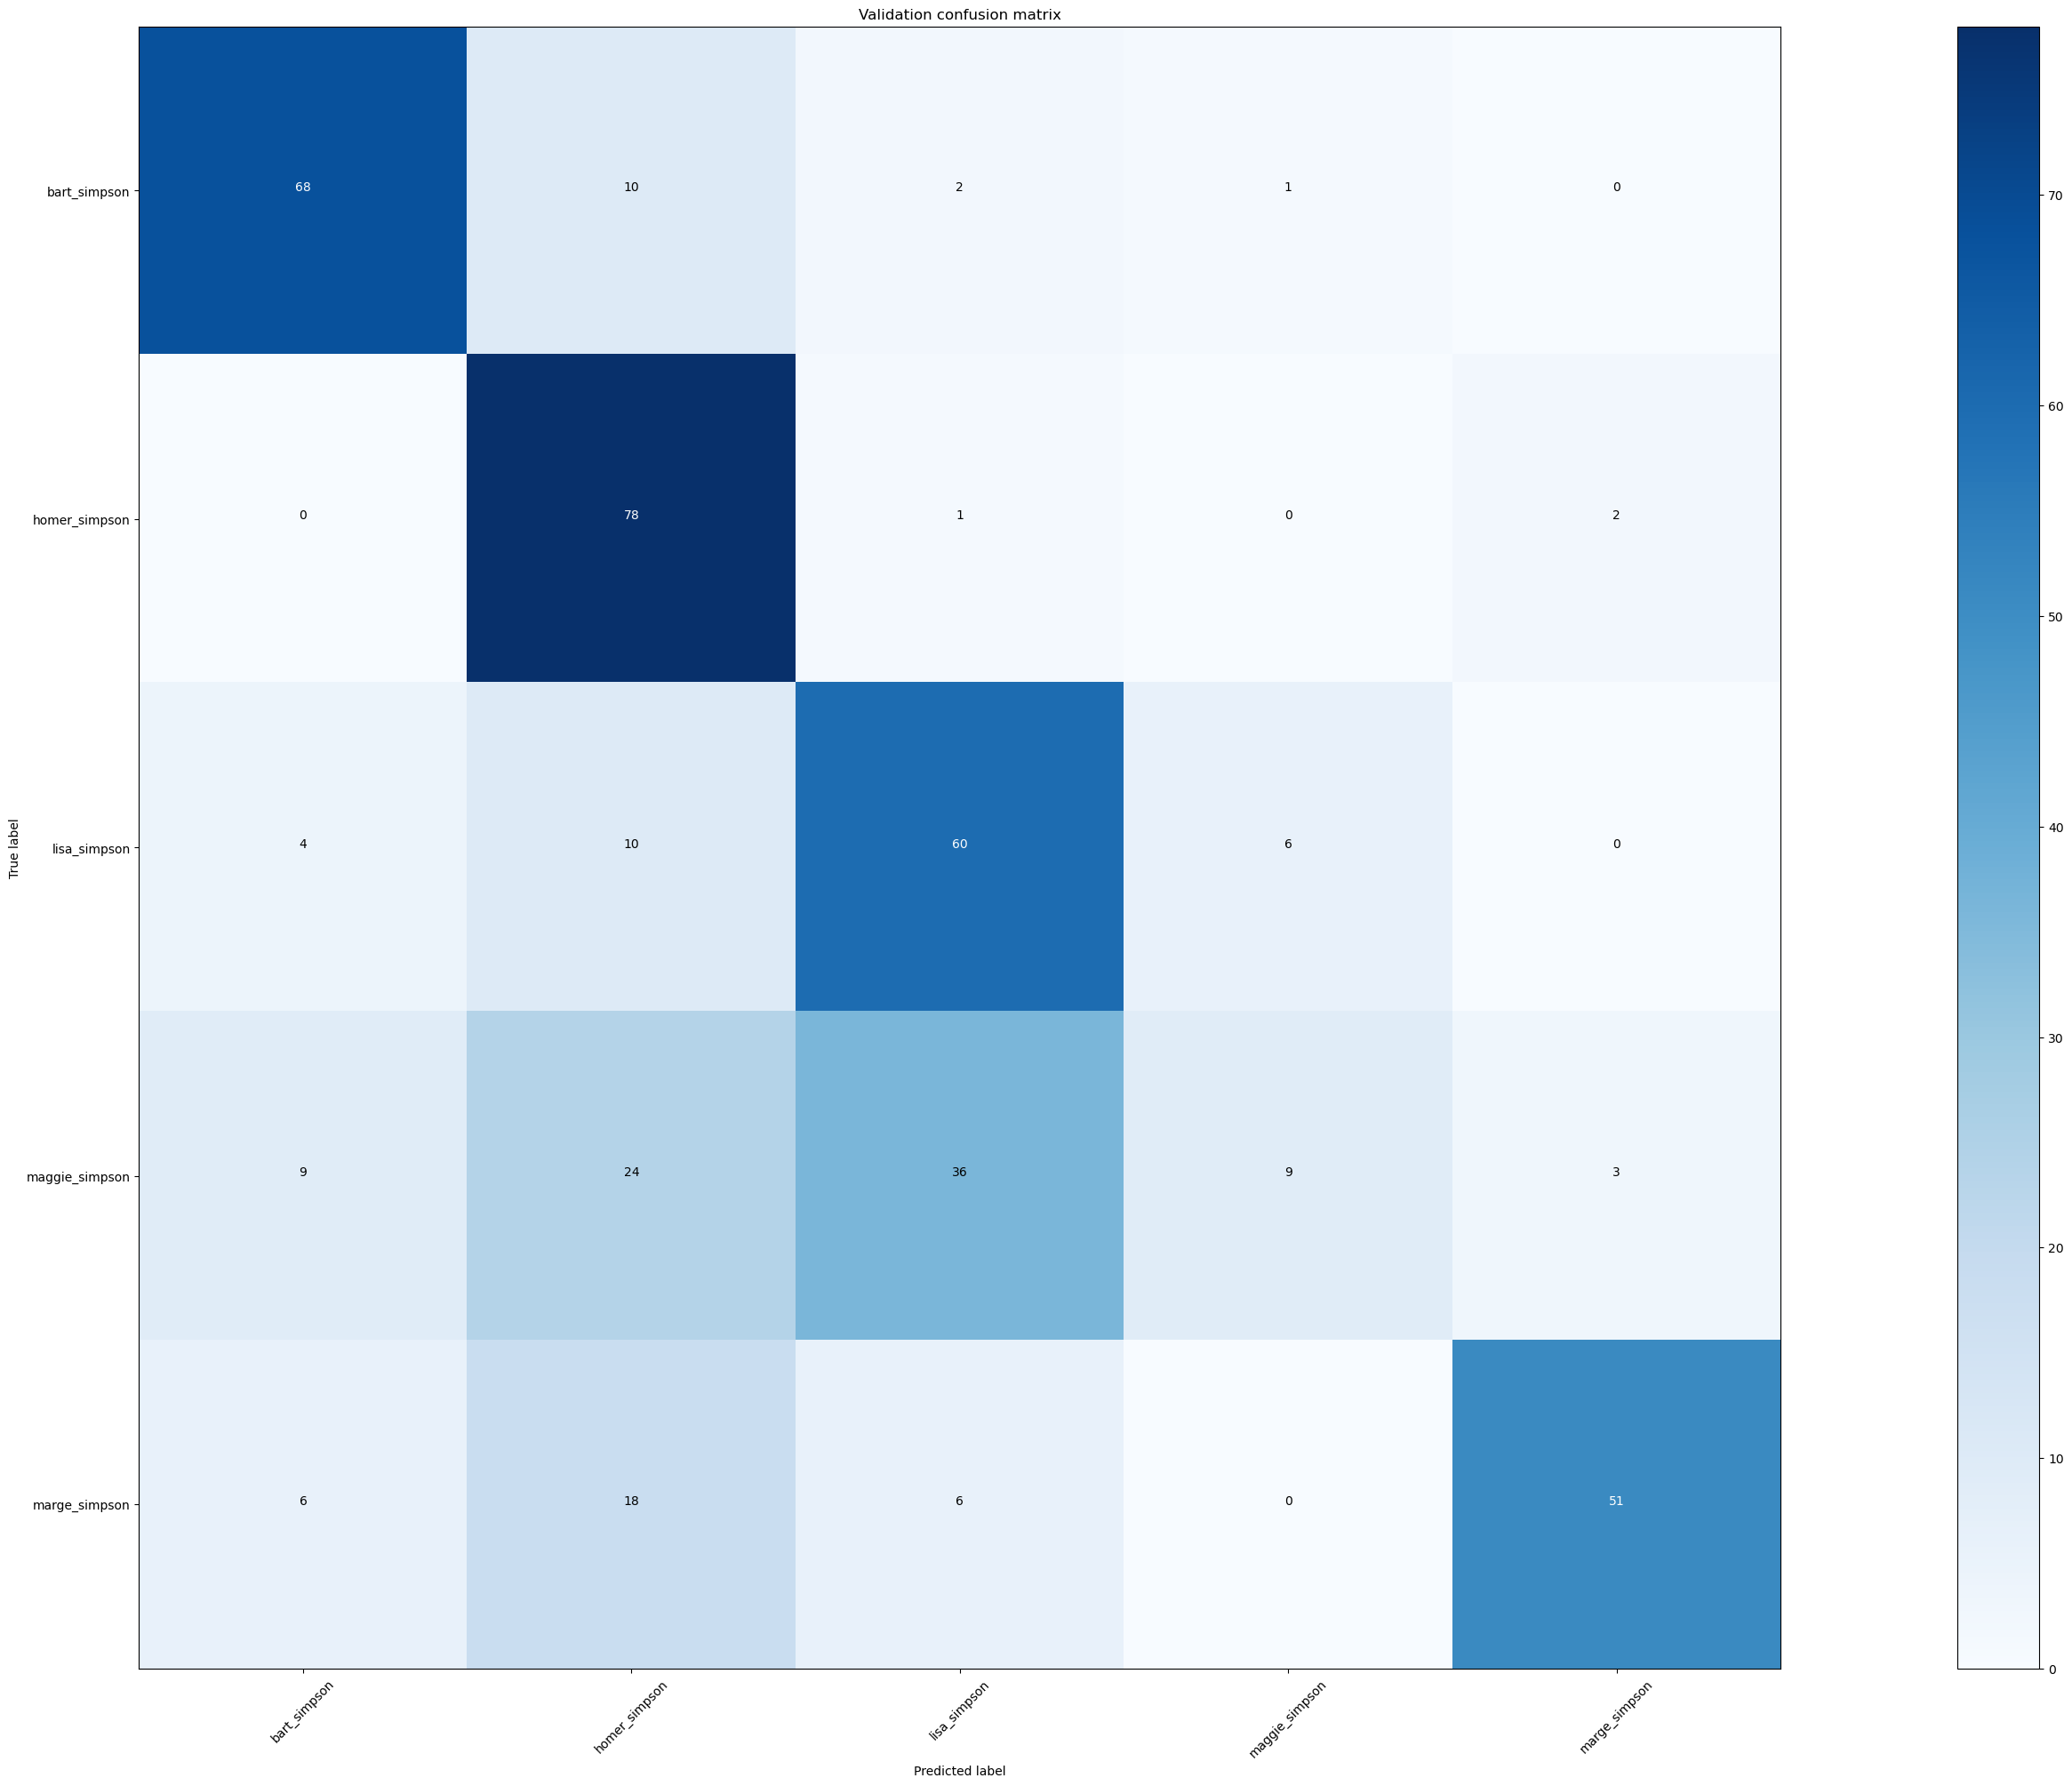

In [42]:
plot_confusion_matrix(cm, labels, title='Train confusion matrix')
plot_confusion_matrix(valid_cm, labels, title='Validation confusion matrix')